# ML 1 - Price Prediction Using Linear Regression Model

In [1]:
# Importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

In [2]:
home_prices = pd.read_csv('homeprices.csv')
home_prices

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [3]:
home_prices.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


In [4]:
home_prices.shape

(5, 2)

In [5]:
home_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


array([[<Axes: xlabel='area', ylabel='area'>,
        <Axes: xlabel='price', ylabel='area'>],
       [<Axes: xlabel='area', ylabel='price'>,
        <Axes: xlabel='price', ylabel='price'>]], dtype=object)

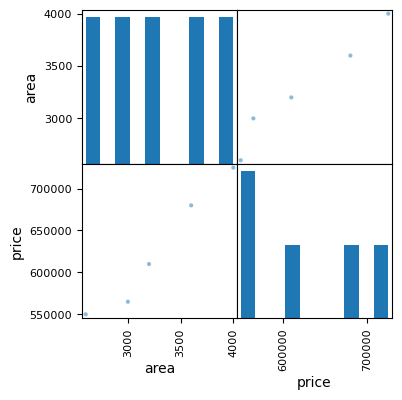

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(home_prices, figsize=(4,4))

Text(0.5, 1.0, 'Price Vs Area')

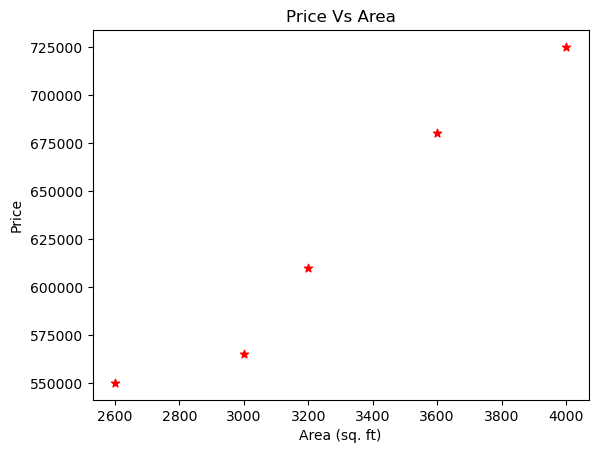

In [13]:
plt.scatter(home_prices.area, home_prices.price, color = 'red', marker = '*')
plt.xlabel("Area (sq. ft)")
plt.ylabel("Price")
plt.title("Price Vs Area")

Linear Regression:


*   Establishes relationship between a dependent variable and one or more independent variables.
*   To use Linear Regression Model, Use sklearn's 'model_selection' module.




In [61]:
# Using Linear Regression model in linear_model module
linear_reg = linear_model.LinearRegression()

# After the model is selected feed the values of the attributes.

linear_reg.fit(home_prices[['area']], home_prices.price)
# linear_reg.fit(home_prices[['price']], home_prices.area)


# Predicts price for an area of 3790 sq ft.
# linear_reg.predict([[3790]] )

LinearRegression()

In [9]:
# Checking the slope and intercept

lin_Slope = linear_reg.coef_
lin_Intercept = linear_reg.intercept_
# lin_Slope
lin_Intercept

-1138.4957721406317

In [10]:
# Cross-Checking calculations:
# Formula ->  y = m * x + c

y = (135.78767123) * 3790 + 180616.43835616432;
print (y)

# Therefore our calculations are correct

695251.7123178643


In [17]:
area_df = pd.read_csv('areas.csv')

# Now predicting prices of areas
linear_reg.predict(area_df)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [22]:
# Now similarly, we will predict area on the basis of prices

prices_df = pd.read_csv('prices.csv')
predicted_price = linear_reg.predict(prices_df)

In [23]:
# Adding the predicted prices to its corresponding price value in prices_df

prices_df['Predicted Area'] = predicted_price
prices_df

,price,Predicted Area
0,550000,2743.569203
1,420000,1825.990209
2,350000,1331.909212
3,490000,2320.071206
4,600000,3096.484201
5,680000,3661.148198
6,720000,3943.480196
7,480000,2249.488206
8,690000,3731.731197
9,320000,1120.160214


In [34]:
# Price Prediction column is exported as csv file

prices_df.to_csv('Prediction.csv', index=False)

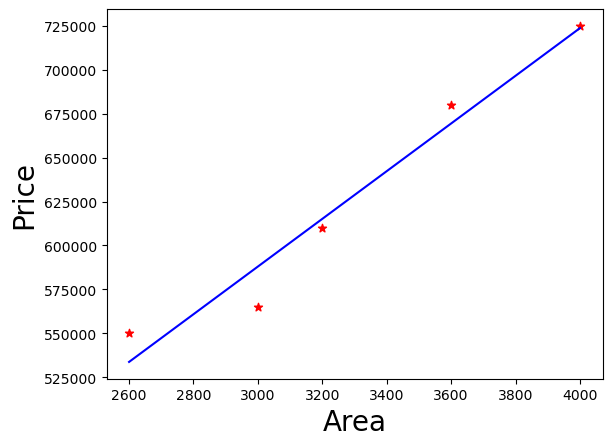

In [62]:
# Visualizing the model prediction

plt.xlabel('Area', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.scatter(home_prices.area, home_prices.price, marker='*', color = 'red')
plt.plot(home_prices.area, linear_reg.predict(home_prices[['area']]), color = 'blue')